In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Projeto Internações/Preparação dos dados/dataset_internacoes_completo.csv')

In [4]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0
2,48,2010-01-01,AC,BRASILÉIA,22325.0
3,2,2010-01-01,AC,BUJARI,8838.0
4,4,2010-01-01,AC,CAPIXABA,9179.0
...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0


In [5]:
dataset['populacao'].dtype

dtype('float64')

In [6]:
def porte(populacao):
  if populacao <= 20000:
    return 'Pequeno Porte I'
  elif populacao >= 20001 and populacao <= 50000 :
    return 'Pequeno Porte II'
  elif populacao >= 50001 and populacao <= 100000:
    return 'Médio Porte'
  elif populacao >= 100001 and populacao <= 900000:
    return 'Grande Porte'
  elif populacao >= 900001:
    return 'Metrópole'

In [7]:
def taxa_internacao (row):
  return row['Qtd. internacoes']*1000/row['populacao']

In [8]:
dataset['Taxa Internacoes'] = dataset.apply(taxa_internacao, axis =1)

In [9]:
dataset['Porte'] = dataset['populacao'].apply(porte)

In [10]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,Taxa Internacoes,Porte
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0,1.070255,Pequeno Porte I
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0,1.104972,Pequeno Porte I
2,48,2010-01-01,AC,BRASILÉIA,22325.0,2.150056,Pequeno Porte II
3,2,2010-01-01,AC,BUJARI,8838.0,0.226296,Pequeno Porte I
4,4,2010-01-01,AC,CAPIXABA,9179.0,0.435777,Pequeno Porte I
...,...,...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0,1.212016,Pequeno Porte II
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0,0.621891,Pequeno Porte I
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0,0.466853,Pequeno Porte I
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0,1.069900,Pequeno Porte I


Filtro

In [11]:
dataset = dataset[dataset['Porte'] == 'Grande Porte']

In [12]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,Taxa Internacoes,Porte
15,275,2010-01-01,AC,RIO BRANCO,350589.0,0.784394,Grande Porte
24,395,2010-01-01,AL,ARAPIRACA,219165.0,1.802295,Grande Porte
169,86,2010-01-01,AM,PARINTINS,104059.0,0.826454,Grande Porte
192,239,2010-01-01,AP,MACAPÁ,412916.0,0.578810,Grande Porte
198,80,2010-01-01,AP,SANTANA,105003.0,0.761883,Grande Porte
...,...,...,...,...,...,...,...
1024727,52,2024-04-01,SP,VALINHOS,109476.0,0.474990,Grande Porte
1024732,42,2024-04-01,SP,VÁRZEA PAULISTA,109780.0,0.382583,Grande Porte
1024738,81,2024-04-01,SP,VOTORANTIM,111543.0,0.726177,Grande Porte
1024752,234,2024-04-01,TO,ARAGUAÍNA,153698.0,1.522466,Grande Porte


In [13]:
time_series = dataset[['Data completa', 'Taxa Internacoes']]
time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])

<ipython-input-13-3454ab67a598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])


In [14]:
time_series = time_series.set_index('Data completa').resample('M').mean()

In [15]:
time_series = time_series[:'2019-12-31']

In [16]:
time_series.describe()

,Taxa Internacoes
count,120.000000
mean,0.737045
std,0.060372
min,0.620791
25%,0.697996
50%,0.726542
75%,0.776463
max,0.873748


array([[<Axes: title={'center': 'Taxa Internacoes'}>]], dtype=object)

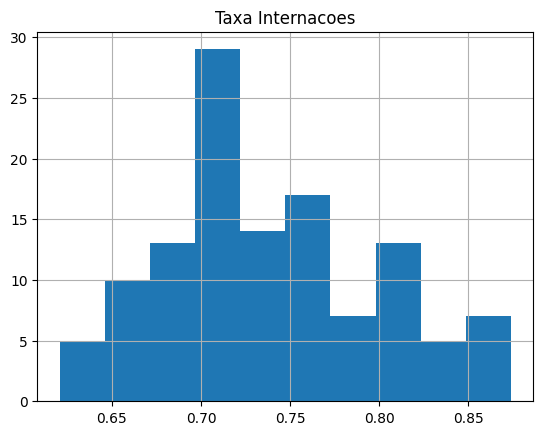

In [17]:
time_series.hist()

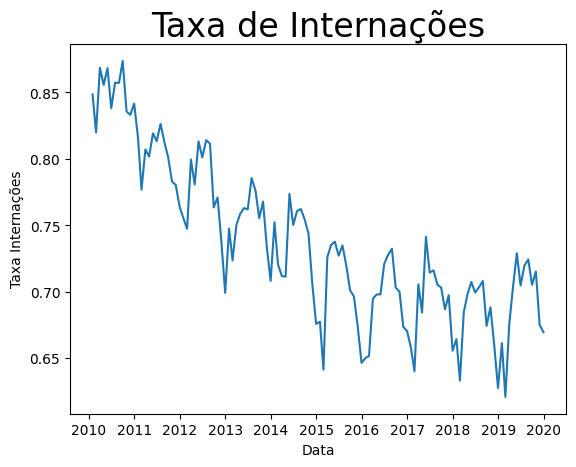

In [18]:
plt.plot(time_series)
plt.title('Taxa de Internações', fontsize=24)
plt.ylabel('Taxa Internações')
plt.xlabel('Data')
plt.show()

#Teste de Estacionariedade

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
X = time_series['Taxa Internacoes']
result = adfuller(X)
print('ADF Estatíticas: %f' % result[0])
print('Valor de P: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Estatíticas: -3.505900
Valor de P: 0.007837
Valores Críticos:
	1%: -3.493
	5%: -2.889
	10%: -2.581


#Tornando a série estacionária (Diferenciação)

In [21]:
xdiff = X.diff()
xdiff = xdiff.dropna()

<Axes: xlabel='Data completa'>

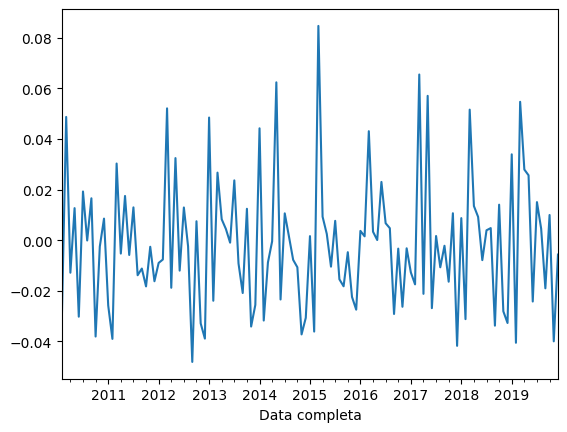

In [22]:
xlabel='Data'
xdiff.plot()

In [23]:
result = adfuller(xdiff)
print('ADF Estatíticas: %f' % result[0])
print('Valor de P: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Estatíticas: -3.865386
Valor de P: 0.002305
Valores Críticos:
	1%: -3.493
	5%: -2.889
	10%: -2.581


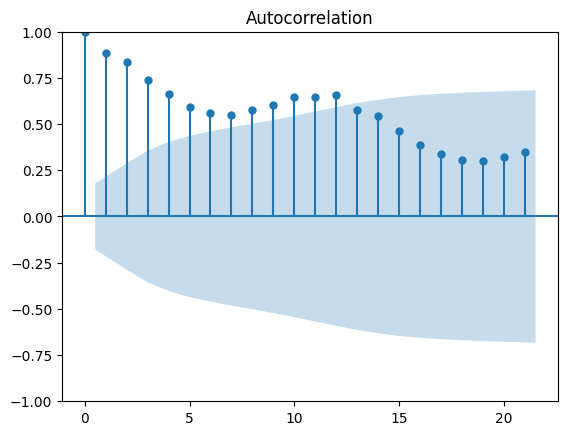

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X)
plt.show()

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Suavização Exponencial Simples


In [26]:
X_base = X[:'2018-12-31']

In [27]:
X_base

,Taxa Internacoes
Data completa,
2010-01-31,0.848591
2010-02-28,0.819916
2010-03-31,0.868586
2010-04-30,0.855718
2010-05-31,0.868364
...,...
2018-08-31,0.708054
2018-09-30,0.674270
2018-10-31,0.688278


In [28]:
fit1 = SimpleExpSmoothing(X_base).fit(smoothing_level=0.2,optimized=False) #alpha = 0.2: 20% de peso para as observações mais recentes, optimazed: acha um valor otimizado para o smoothing_level
fcast1 = fit1.forecast(12)

In [29]:
fcast1

,0
2019-01-31,0.672944
2019-02-28,0.672944
2019-03-31,0.672944
2019-04-30,0.672944
2019-05-31,0.672944
2019-06-30,0.672944
2019-07-31,0.672944
2019-08-31,0.672944
2019-09-30,0.672944
2019-10-31,0.672944


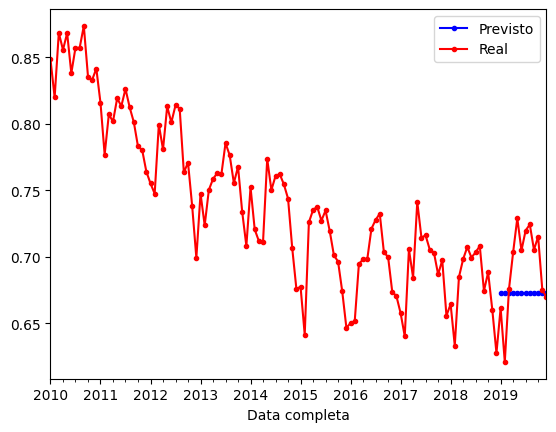

In [30]:
fcast1.plot(marker='.', color='blue', legend=True, label = 'Previsto')
X.plot(marker='.',  color='red', label = 'Real', legend = True)
plt.show()

In [31]:
real = X['2019-01-01':]

In [32]:
real

,Taxa Internacoes
Data completa,
2019-01-31,0.661335
2019-02-28,0.620791
2019-03-31,0.675440
2019-04-30,0.703329
2019-05-31,0.728952
2019-06-30,0.704707
2019-07-31,0.719730
2019-08-31,0.724261
2019-09-30,0.705227


In [33]:
mean_absolute_error(real, fcast1)

0.030226836216176323

In [34]:
np.sqrt(mean_squared_error(real, fcast1))

0.03604843037175904

In [35]:
mean_squared_error(real, fcast1)

0.0012994893322675596

In [36]:
mean_absolute_percentage_error(real, fcast1)

0.043294043160867095

#Holt

In [37]:
fit1 = Holt(X_base).fit(smoothing_level=0.2, smoothing_trend=0.8, optimized=False)
fcast1 = fit1.forecast(12)

In [38]:
mean_absolute_error(real, fcast1)

0.11308128781270399

In [39]:
np.sqrt(mean_squared_error(real, fcast1))

0.12662927457649456

In [40]:
mean_squared_error(real, fcast1)

0.01603497317976925

In [41]:
mean_absolute_percentage_error(real, fcast1)

0.16151470125736064

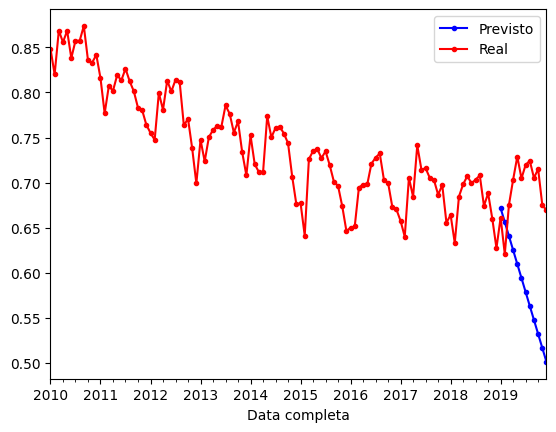

In [42]:
fcast1.plot(marker='.', color='blue', legend=True, label = 'Previsto')
X.plot(marker='.',  color='red', label = 'Real', legend = True)
plt.show()

#Holt tendencia amortecida

In [43]:
fit3 = Holt(X_base, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(12)

In [44]:
mean_absolute_error(real, fcast3)

0.08398970563025972

In [45]:
mean_squared_error(real, fcast3)

0.008355868977981913

In [46]:
np.sqrt(mean_squared_error(real, fcast3))

0.09141044239025382

In [47]:
mean_absolute_percentage_error(real, fcast3)

0.11926275899085548

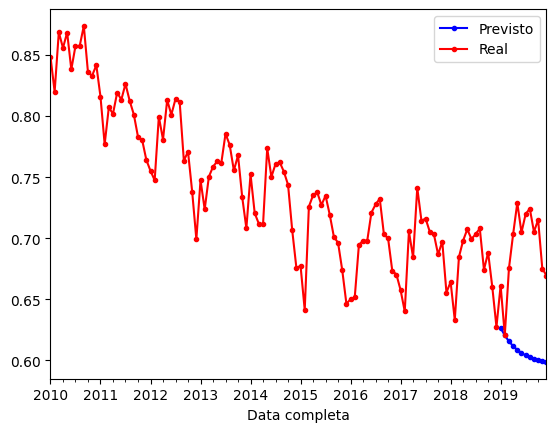

In [48]:
fcast3.plot(marker='.', color='blue', legend=True, label = 'Previsto')
X.plot(marker='.',  color='red', label = 'Real', legend = True)
plt.show()

#Holt Winters

In [49]:
fit1 = ExponentialSmoothing(X_base, seasonal_periods=12, trend='additive', seasonal='add', use_boxcox=True).fit()

In [50]:
forecast = fit1.forecast(12)

In [51]:
forecast

,0
2019-01-31,0.644604
2019-02-28,0.625839
2019-03-31,0.661853
2019-04-30,0.660183
2019-05-31,0.677811
2019-06-30,0.670059
2019-07-31,0.678349
2019-08-31,0.674775
2019-09-30,0.660318
2019-10-31,0.656071


In [52]:
mean_absolute_error(real, forecast)

0.03695462989433263

In [53]:
np.sqrt(mean_squared_error(real, forecast))

0.04029888822161005

In [54]:
mean_squared_error(real, forecast)

0.001624000391897821

In [55]:
mean_absolute_percentage_error(real, forecast)

0.052650031985301014

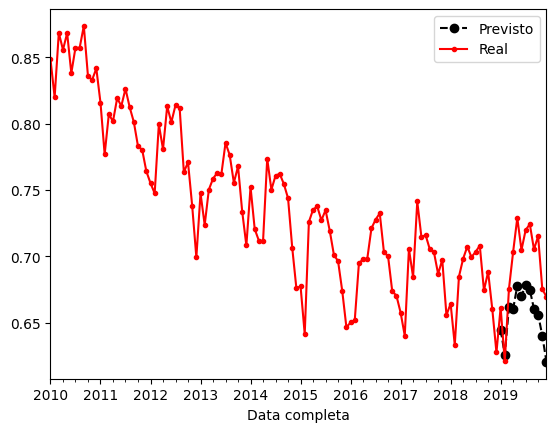

In [56]:
fit1.forecast(12).plot(style='--', marker='o', color='black', legend=True, label = 'Previsto')
X.plot(marker='.',  color='red', label = 'Real', legend = True)
plt.show()
